<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/20_Introduction_to_Deep_Learning_with_PyTorch/01_Introduction_to_PyTorch%2C_a_Deep_Learning_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Introduction to PyTorch, a Deep Learning Library


Deep learning is everywhere, from smartphone cameras to voice assistants or self-driving cars. In this course, you will discover this powerful technology and learn how to leverage it using PyTorch, one of the most popular deep learning libraries. By the end of this course, you will be able to leverage PyTorch to solve classification and regression problems using deep learning.

Self-driving cars, smartphones, search engines... Deep learning is now everywhere. Before you begin building complex models, you will become familiar with PyTorch, a deep learning framework. You will learn how to manipulate tensors, create PyTorch data structures, and build your first neural network in PyTorch with linear layers.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/19_Feature_Engineering_for_NLP_in_Python/Dataset/ted.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
ted = pd.read_csv(url)


display(ted.head())

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


**Getting started with PyTorch tensors**  
Tensors are PyTorch's core data structure and the foundation of deep learning. They're similar to NumPy arrays but have unique features.

Here you have a Python list named temperatures containing daily readings from two weather stations. Try converting this into a tensor!

In [1]:
# Import PyTorch
import torch

temperatures = [[72, 75, 78], [70, 73, 76]]

# Create a tensor from temperatures
temp_tensor = torch.tensor(temperatures)

print(temp_tensor)

tensor([[72, 75, 78],
        [70, 73, 76]])


**Checking and adding tensors**  
While collecting temperature data, you notice the readings are off by two degrees. Add two degrees to the temperatures tensor after verifying its shape and data type with torch to ensure compatibility with the adjustment tensor.

The torch library and the temperatures tensor are loaded for you.

In [7]:
adjustment = torch.tensor([[2, 2, 2], [2, 2, 2]])

# Display the shape of the adjustment tensor
print("Adjustment shape:", adjustment.shape)

# Display the type of the adjustment tensor
print("Adjustment type:", adjustment.dtype)

# Convert temperatures to a tensor before accessing shape and dtype
temp_tensor = torch.tensor(temperatures)
print("Temperatures shape:", temp_tensor.shape)
print("Temperatures type:", temp_tensor.dtype)

Adjustment shape: torch.Size([2, 3])
Adjustment type: torch.int64
Temperatures shape: torch.Size([2, 3])
Temperatures type: torch.int64


In [4]:
adjustment = torch.tensor([[2, 2, 2], [2, 2, 2]])

# Add the temperatures and adjustment tensors
corrected_temperatures = torch.tensor(temperatures) + adjustment
print("Corrected temperatures:", corrected_temperatures)

# You've verified the tensors and adjusted the temperature data. Next, let’s learn the role of tensors within neural networks.

Corrected temperatures: tensor([[74, 77, 80],
        [72, 75, 78]])


### Neural networks and layers


**Linear layer network**   
Neural networks often contain many layers, but most of them are linear layers. Understanding a single linear layer helps you grasp how they work before adding complexity.

Apply a linear layer to an input tensor and observe the output.

In [8]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

# Create a Linear layer
linear_layer = nn.Linear(
                         in_features=3,
                         out_features=2
                         )

# Pass input_tensor through the linear layer
output = linear_layer(input_tensor)

print(output)

tensor([[-0.1396, -0.4795]], grad_fn=<AddmmBackward0>)


**Understanding weights**   
In a linear model, weights and biases play a crucial role in determining how inputs are transformed into outputs. Understanding their function is key to building effective neural networks. Now, let's test your understanding!

    ->
    Weights determine how much influence each input has on the neuron's output

    Weights adjust the contribution of each input feature, allowing the network to learn patterns and make better predictions.

**Your first neural network**  
It's time for you to implement a small neural network containing two linear layers in sequence.



In [9]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Create a container for stacking linear layers
model = nn.Sequential(nn.Linear(8, 4),
                nn.Linear(4, 1)
                )

output = model(input_tensor)
print(output)

# Modern neural networks often span hundreds of layers. You'll review how to stack them next.

tensor([[-0.3266]], grad_fn=<AddmmBackward0>)


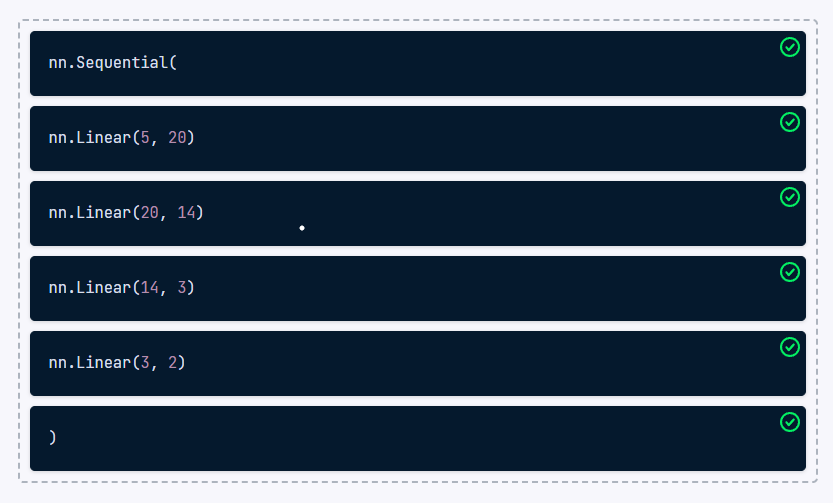

**Counting the number of parameters**  
Deep learning models are famous for having a lot of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has.

In this exercise, you'll first calculate the number of parameters manually. Then, you'll verify your result using the .numel() method.

***Question***

Manually calculate the number of parameters of the model below. How many does it have? Use the console as a calculator.

    model = nn.Sequential(nn.Linear(9, 4),
                          nn.Linear(4, 2),
                          nn.Linear(2, 1))

    -> 53

In [10]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(9, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))

total = 0

# Calculate the number of parameters in the model
for p in model.parameters():
  total += p.numel()

print(f"The number of parameters in the model is {total}")

# verifying your model's parameters! Modern language models have billions of parameters, but understanding how these numbers are derived is essential.

The number of parameters in the model is 53
